# importing libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Loading dataset 

In [2]:
data = pd.read_csv('data3.csv')
data.sample(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,yr_built,airconditioning,basement,city,statezip,country
501,5/12/2014 0:00,499950,3,1.00,980,6380,1.0,0,0,760,1941,no,no,Seattle,WA 98115,USA
374,5/8/2014 0:00,413450,3,2.50,1540,1614,3.0,0,0,1470,2008,no,yes,Seattle,WA 98103,USA
304,5/7/2014 0:00,405000,3,2.25,1660,8307,1.0,0,0,1660,1961,no,yes,Shoreline,WA 98133,USA
87,5/5/2014 0:00,620000,3,1.75,1480,2185,2.5,0,0,1480,2005,no,yes,Kirkland,WA 98033,USA
512,5/12/2014 0:00,339000,3,1.00,1080,8100,1.0,0,0,1080,1955,no,no,Shoreline,WA 98155,USA


In [5]:
data.shape

(545, 16)

In [3]:
data.isnull().sum()

date               0
price              0
bedrooms           0
bathrooms          0
sqft_living        0
sqft_lot           0
floors             0
waterfront         0
view               0
sqft_above         0
yr_built           0
airconditioning    0
basement           0
city               0
statezip           0
country            0
dtype: int64

# Data preprocessing

In [90]:
# Removing non numerical columns 
data.drop('city',axis=1,inplace=True)
data.drop('statezip',axis=1,inplace=True)
data.drop('country',axis=1,inplace=True)

In [91]:
data.sample(3)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,yr_built,airconditioning,basement
193,5/6/2014 0:00,1225000,4,2.25,3490,6906,2.0,0,0,2280,1928,no,yes
413,5/9/2014 0:00,382000,3,3.25,1410,1253,3.0,0,0,1410,2005,no,yes
253,5/7/2014 0:00,420000,2,1.50,1040,3500,1.5,0,0,1040,1904,no,no


In [92]:
# Number of rows and columns
data.shape

(545, 13)

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             545 non-null    object 
 1   price            545 non-null    int64  
 2   bedrooms         545 non-null    int64  
 3   bathrooms        545 non-null    float64
 4   sqft_living      545 non-null    int64  
 5   sqft_lot         545 non-null    int64  
 6   floors           545 non-null    float64
 7   waterfront       545 non-null    int64  
 8   view             545 non-null    int64  
 9   sqft_above       545 non-null    int64  
 10  yr_built         545 non-null    int64  
 11  airconditioning  545 non-null    object 
 12  basement         545 non-null    object 
dtypes: float64(2), int64(8), object(3)
memory usage: 55.5+ KB


In [94]:
# Convert type of columns from object to date
for col in data.columns:
    if 'yr' in col or 'date' in col:
        data[col]=pd.to_datetime(data[col])

In [95]:
# Round bathroom values
data['bathrooms'] = np.round(data['bathrooms'])

In [96]:
# Convert type of columns from float to integer
for cols in data.columns:
    if 'room' in cols or 'floor' in cols:
         data[cols] = data[cols].astype(int)

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             545 non-null    datetime64[ns]
 1   price            545 non-null    int64         
 2   bedrooms         545 non-null    int32         
 3   bathrooms        545 non-null    int32         
 4   sqft_living      545 non-null    int64         
 5   sqft_lot         545 non-null    int64         
 6   floors           545 non-null    int32         
 7   waterfront       545 non-null    int64         
 8   view             545 non-null    int64         
 9   sqft_above       545 non-null    int64         
 10  yr_built         545 non-null    datetime64[ns]
 11  airconditioning  545 non-null    object        
 12  basement         545 non-null    object        
dtypes: datetime64[ns](2), int32(3), int64(6), object(2)
memory usage: 49.1+ KB


# Data Analysis

In [98]:
# Statistical measures
data.describe()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,yr_built
count,545,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545
mean,2014-05-07 01:27:11.559633152,5.561772e+05,3.411009,2.082569,2126.713761,16987.018349,1.442202,0.009174,0.198165,1799.218349,1970-01-01 00:00:00.000001970
min,2014-05-02 00:00:00,1.000000e+05,1.000000,1.000000,700.000000,681.000000,1.000000,0.000000,0.000000,650.000000,1970-01-01 00:00:00.000001900
25%,2014-05-05 00:00:00,3.350000e+05,3.000000,2.000000,1420.000000,5003.000000,1.000000,0.000000,0.000000,1190.000000,1970-01-01 00:00:00.000001951
50%,2014-05-07 00:00:00,4.880000e+05,3.000000,2.000000,1940.000000,7740.000000,1.000000,0.000000,0.000000,1550.000000,1970-01-01 00:00:00.000001975
75%,2014-05-09 00:00:00,6.500000e+05,4.000000,2.000000,2600.000000,11130.000000,2.000000,0.000000,0.000000,2190.000000,1970-01-01 00:00:00.000001997
max,2014-05-13 00:00:00,3.200000e+06,9.000000,8.000000,13540.000000,435600.000000,3.000000,1.000000,4.000000,9410.000000,1970-01-01 00:00:00.000002014
std,NaN,3.440439e+05,0.941227,0.749123,1028.922574,38068.163676,0.579092,0.095430,0.692128,882.987693,NaN


C:\Users\Mohamed\AppData\Local\Temp\ipykernel_9584\3852626559.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['price'],kde=False,bins=30)


<Axes: xlabel='price'>

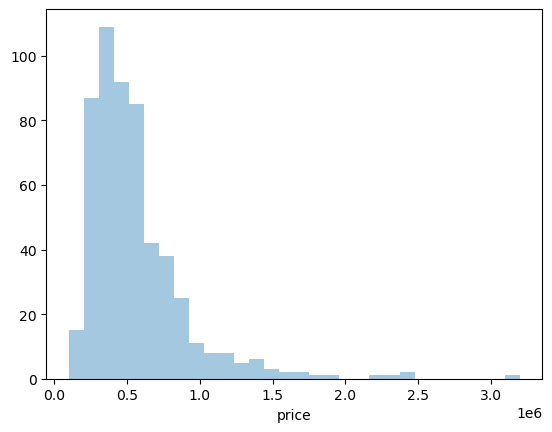

In [99]:
sns.distplot(data['price'],kde=False,bins=30)

In [100]:
# find the correlation
correlation = data.iloc[:,1:11]
correlation = correlation.corr()
correlation

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,yr_built
price,1.000000,0.422971,0.532982,0.704763,0.156499,0.201974,0.188689,0.416459,0.630490,-0.045092
bedrooms,0.422971,1.000000,0.548802,0.639022,0.118904,0.090879,-0.062523,0.128703,0.537075,0.055995
bathrooms,0.532982,0.548802,1.000000,0.728989,0.223756,0.297046,0.040812,0.202379,0.629977,0.275470
sqft_living,0.704763,0.639022,0.728989,1.000000,0.371086,0.274090,0.017999,0.282713,0.889546,0.216624
sqft_lot,0.156499,0.118904,0.223756,0.371086,1.000000,-0.009079,0.003720,0.078891,0.349154,0.101486
floors,0.201974,0.090879,0.297046,0.274090,-0.009079,1.000000,-0.040283,-0.012648,0.445472,0.563123
waterfront,0.188689,-0.062523,0.040812,0.017999,0.003720,-0.040283,1.000000,0.445553,0.039244,-0.053230
view,0.416459,0.128703,0.202379,0.282713,0.078891,-0.012648,0.445553,1.000000,0.199135,-0.091092
sqft_above,0.630490,0.537075,0.629977,0.889546,0.349154,0.445472,0.039244,0.199135,1.000000,0.327559
yr_built,-0.045092,0.055995,0.275470,0.216624,0.101486,0.563123,-0.053230,-0.091092,0.327559,1.000000


<Axes: >

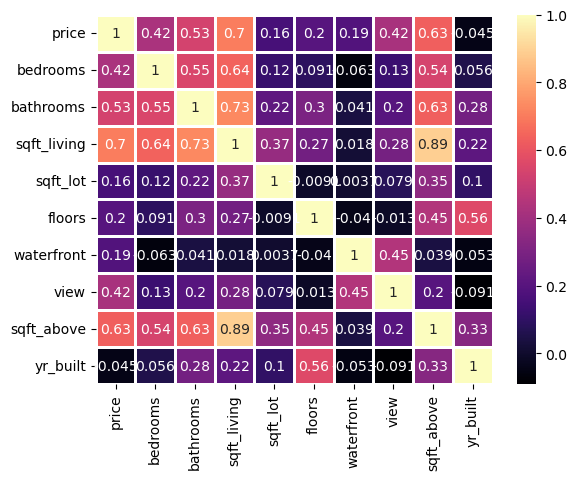

In [101]:
sns.heatmap(correlation,annot=True,cmap='magma',linecolor='white',linewidth=1)

<Axes: xlabel='basement', ylabel='count'>

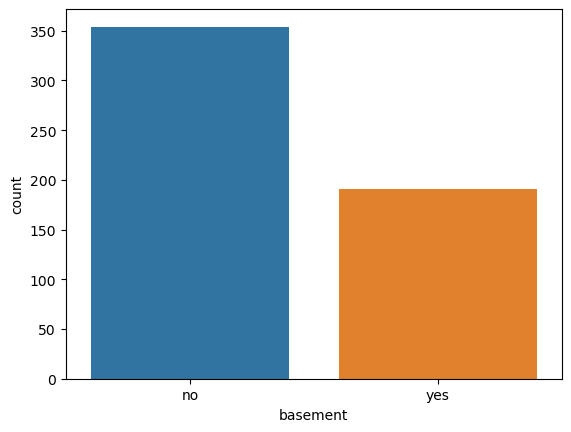

In [102]:
sns.countplot(x='basement',data=data)

<Axes: xlabel='basement', ylabel='price'>

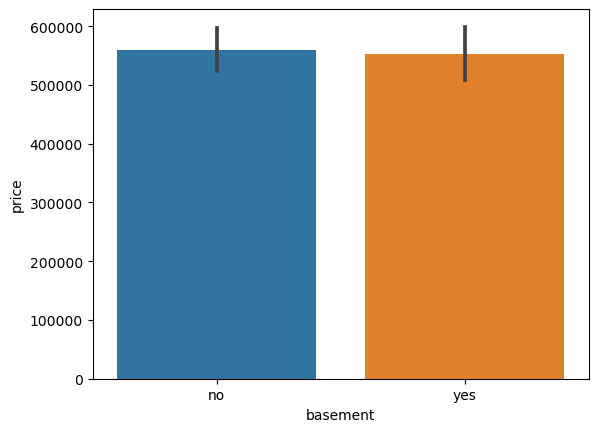

In [103]:
sns.barplot(x='basement',y='price',data=data)

<Axes: xlabel='airconditioning', ylabel='price'>

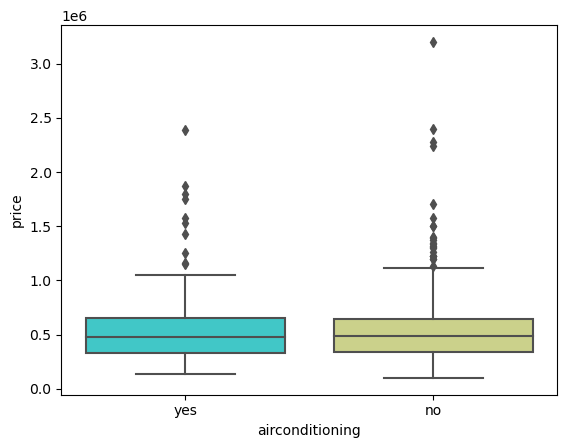

In [104]:
sns.boxplot(x='airconditioning',y='price',data=data,palette='rainbow')

# Spliting Dataset

In [105]:
y = data.iloc[:,1]
y

0       313000
1      2384000
2       342000
3       420000
4       550000
        ...   
540     635000
541    1033888
542     383000
543    1050000
544     455000
Name: price, Length: 545, dtype: int64

In [106]:
x = data.iloc[:,2:10]
x

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,sqft_above
0,3,2,1340,7912,1,0,0,1340
1,5,2,3650,9050,2,0,4,3370
2,3,2,1930,11947,1,0,0,1930
3,3,2,2000,8030,1,0,0,1000
4,4,2,1940,10500,1,0,0,1140
...,...,...,...,...,...,...,...,...
540,3,2,1570,1433,3,0,0,1570
541,4,3,3270,5187,2,0,0,3110
542,4,2,2160,6223,2,0,0,2160
543,4,4,3280,11000,2,0,0,2320


In [80]:
x = x.to_numpy()
y = y.to_numpy()
y = y.reshape(-1,1)

In [81]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.3,random_state=0)

In [82]:
print(f"The shape of X_train is {x_train.shape}")
print(f"The shape of Y_train is {y_train.shape}")
print(f"The shape of X_test is {x_test.shape}")
print(f"The shape of Y_test is {y_test.shape}")

The shape of X_train is (381, 8)
The shape of Y_train is (381, 1)
The shape of X_test is (164, 8)
The shape of Y_test is (164, 1)


# Training the model

In [83]:
# loading linearregression model
reg =LinearRegression()

In [84]:
# model training
reg.fit(x_train,y_train)

LinearRegression()

In [85]:
# model testing
y_pred = reg.predict(x_test)

In [86]:

train_score = reg.score(x_train,y_train)

test_score = reg.score(x_test,y_test)
print(train_score)
print(test_score)

0.5579954766566504
0.5206830677520151


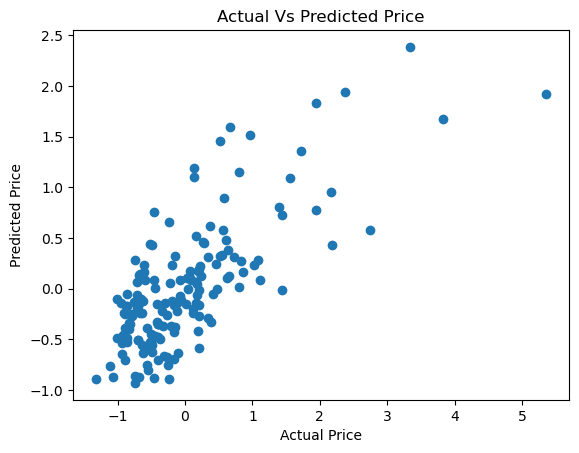

In [68]:
plt.scatter(y_test,y_pred)
plt.title('Actual Vs Predicted Price')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()